<a href="https://colab.research.google.com/github/khundari/RBL-Sains-Data/blob/main/Prediksi_harga_Samsung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [182]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [183]:
url = '/samsungMobilesData.csv'
housing = pd.read_csv(url)
housing


,name,ratings,price,imgURL,camera,display,battery,storage,ram,processor,android_version
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,64,4,not mentioned,12
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,5000,128,6,Snapdragon750GProcessor,12
...,...,...,...,...,...,...,...,...,...,...,...
402,"SAMSUNG Galaxy M40 (Seawater Blue, 128 GB)",4.5,21490,https://rukminim2.flixcart.com/image/312/312/k...,32,other_types,3500,128,6,not mentioned,9
403,"SAMSUNG Galaxy A30s (Prism Crush Violet, 64 GB)",4.3,16199,https://rukminim2.flixcart.com/image/312/312/k...,25,other_types,4000,64,4,not mentioned,12
404,"SAMSUNG Galaxy J4 Plus (Black, 32 GB)",4.4,9000,https://rukminim2.flixcart.com/image/312/312/j...,13,other_types,3300,32,2,Snapdragon425P,8
405,"SAMSUNG Galaxy M01s (Gray, 32 GB)",4.2,10999,https://rukminim2.flixcart.com/image/312/312/k...,13,other_types,4000,32,3,MediaTek,9


In [184]:
housing.shape

(407, 11)

Output pada kode memberikan informasi terkait
- Terdapat 407 baris record dalam data sheet
- Terdapat 11 kolom yaitu: Ratings, price, img URL, camera, display, battery, storage, ram, processor dan android version

Exploratory Data Analysis

# Deskripsi Variabel
- Name : Nama model ponsel pintar Samsung dengan berbagai variasi
- Rattings: Peringkat dan ulasan pengguna terkait dengan setiap model dan mencerminkan kepuasan pelanggan
- Price : Harga ponsel Samsung, yang menunjukkan berbagai variasi harga
- imgURL: Gambar terkait model, memfasilitasi untuk membandingkan perbandingan visual
- Storage_ram: Detail tentang kapasitas penyimpanan dan konfigurasi RAM untuk setiap perangkat
- Processor: Rincian sistem operasi dan prosesor untuk menilai kinerja dan kemampuan perangkat
- camera: Informasi tentng spesifikasi kamera yang digunakan pada setiap variasi perangkat
- Display: Spesifikasi terkait layar, seperti ukuran, resolusi, dan teknologi dimana akan memberikan informasi kepada pengguna mengenai pengalaman visual
- Battery: Spesifikasi terkait batteray, termasuk kapasitas dan daya tahan

In [185]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             407 non-null    object 
 1   ratings          407 non-null    float64
 2   price            407 non-null    int64  
 3   imgURL           407 non-null    object 
 4   camera           407 non-null    int64  
 5   display          407 non-null    object 
 6   battery          407 non-null    int64  
 7   storage          407 non-null    int64  
 8   ram              407 non-null    int64  
 9   processor        407 non-null    object 
 10  android_version  407 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 35.1+ KB


Keluaran yang dihasilkan pada kode di atas akan dijelaskan kembali sebagai berikut:
- Terdapat 4 kolom dengan tipe data object, yaitu : name, imgURL, display dan processor
- Pada kolom data ditemukan 1 kolom dengan tipe data float64, yaitu: ratings
- Terdapat 2 kolom numerik dengan tipe data int64 yaitu : price, camera, battery, storage, ram dan android version


In [186]:
housing.describe()

,ratings,price,camera,battery,storage,ram,android_version
count,407.00000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,4.19828,17363.245700,43.660934,4946.437346,106.199017,5.493857,10.847666
std,0.17762,6735.647203,25.189978,878.467561,58.899992,2.185789,1.829261
min,2.90000,6490.000000,0.000000,1500.000000,1.000000,1.000000,1.000000
25%,4.10000,11982.500000,20.000000,4500.000000,64.000000,4.000000,10.000000
50%,4.20000,15999.000000,48.000000,5000.000000,128.000000,6.000000,11.000000
75%,4.30000,21744.500000,50.000000,5500.000000,128.000000,6.000000,12.000000
max,4.80000,32000.000000,200.000000,7000.000000,512.000000,12.000000,13.000000


Fungsi describe() berfungsi sebagai pemberi informasi statistik pada masing-masing kolom, antara lain:

- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

# Data Assesing

**Data Duplikat**

In [187]:
housing.duplicated().sum()

0

 **Missing Value**

In [188]:
housing.isna().sum()

name               0
ratings            0
price              0
imgURL             0
camera             0
display            0
battery            0
storage            0
ram                0
processor          0
android_version    0
dtype: int64

# Data Cleaning

**Imputation**
Terdapat 0 data null, maka dari itu tidak diperlukan analisis menggunakan imputation

# Menangani Outliers
Beberapa pengamatan dalam satu set data kadang berada di luar lingkungan pengamatan lainnya. Pengamatan seperti itu disebut outlier.

Ada beberapa teknik untuk menangani outliers, antara lain:

Hypothesis Testing
Z-score method
IQR Method
Pada kasus ini, Anda akan mendeteksi outliers dengan teknik visualisasi data (boxplot). Kemudian, Anda akan menangani outliers dengan teknik IQR method

IQR = Inter Quartile Range

IQR = Q3 - Q1.


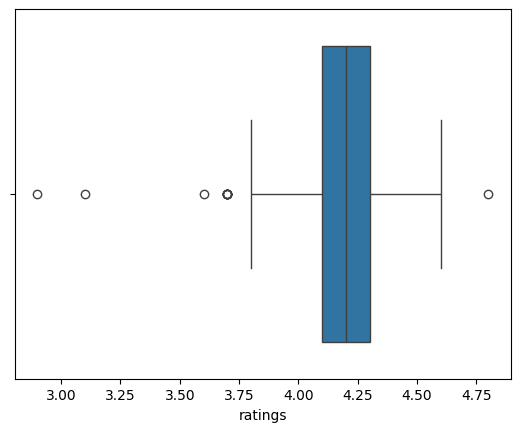

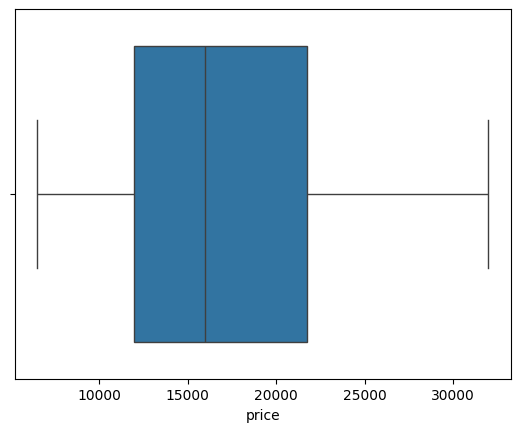

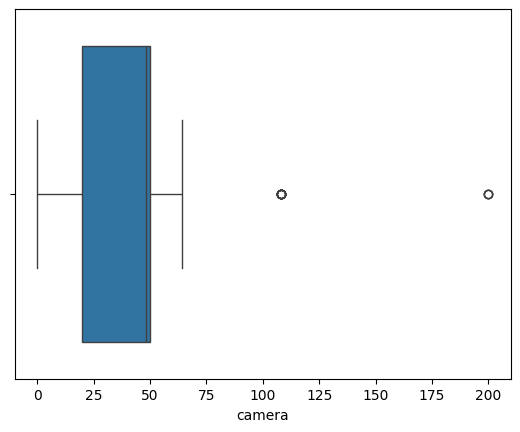

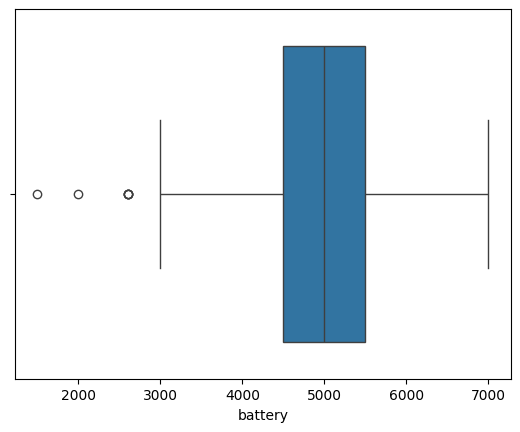

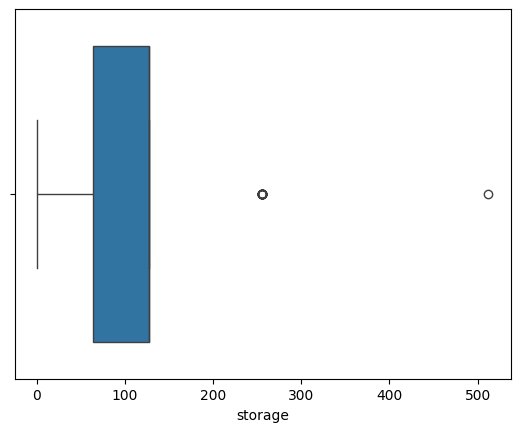

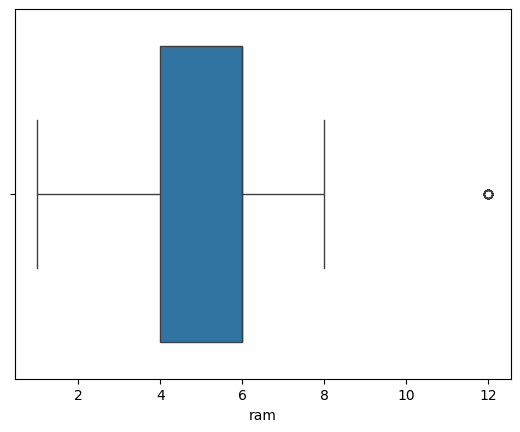

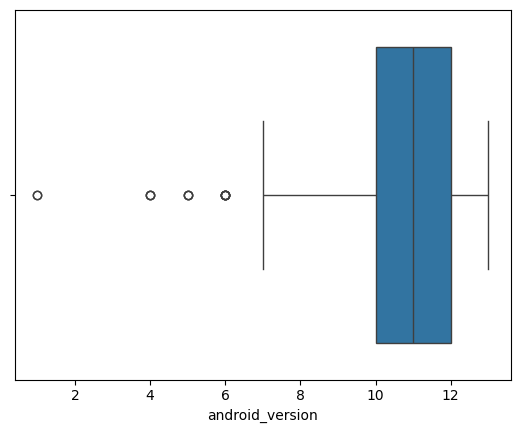

In [189]:
housing1=housing.select_dtypes(exclude=['object'])
for column in housing1:
        plt.figure()
        sns.boxplot(data=housing1, x=column)

In [190]:
Q1 = housing.quantile(0.25)
Q3 = housing.quantile(0.75)
IQR=Q3-Q1
housing = housing[~((housing<(Q1-1.5*IQR))|(housing>(Q3+1.5*IQR))).any(axis=1)]

<ipython-input-190-1eff47663bc7>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = housing.quantile(0.25)
<ipython-input-190-1eff47663bc7>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = housing.quantile(0.75)
<ipython-input-190-1eff47663bc7>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  housing = housing[~((housing<(Q1-1.5*IQR))|(housing>(Q3+1.5*IQR))).any(axis=1)]


Cek ukuran dataset setelah drop outliers dengan housing.shape

In [191]:
housing.shape

(346, 11)

# Data Analisys
Selanjutnya, lakukan proses analisis data dengan teknik Univariate EDA. Pertama, Anda bagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [192]:
categorical_features = ['name', 'imgURL', 'display', 'processor','ratings']
numerical_features = ['price' , 'camera', 'battery' , 'storage' , 'ram' ,'android version']


# Univariate Analysis
Univariate visualization adalah bentuk visualisasi sta yang mempresentasikan informasi yang terdapat pada satu variabel. Jenis visualisasi ini digunakan untuk memberikan gambaran terkait suatu datasheet.

a. Data Kategori

                                             Jumlah sampel  Persentase
SAMSUNG Galaxy M32 5G (Sky Blue, 128 GB)                 4         1.2
SAMSUNG Galaxy A23 (Peach, 128 GB)                       3         0.9
SAMSUNG Galaxy A10s (Blue, 32 GB)                        3         0.9
SAMSUNG Galaxy A33 (Awesome White, 128 GB)               3         0.9
SAMSUNG Galaxy M32 5G (Slate Black, 128 GB)              3         0.9
...                                                    ...         ...
SAMSUNG Galaxy A04 (Black, 64 GB)                        1         0.3
SAMSUNG Galaxy A04 (Copper, 128 GB)                      1         0.3
SAMSUNG Galaxy A04e (Light Blue, 128 GB)                 1         0.3
SAMSUNG Galaxy A13 (Black, 64 GB)                        1         0.3
SAMSUNG Galaxy S22 (Pink Gold, 128 GB)                   1         0.3

[259 rows x 2 columns]


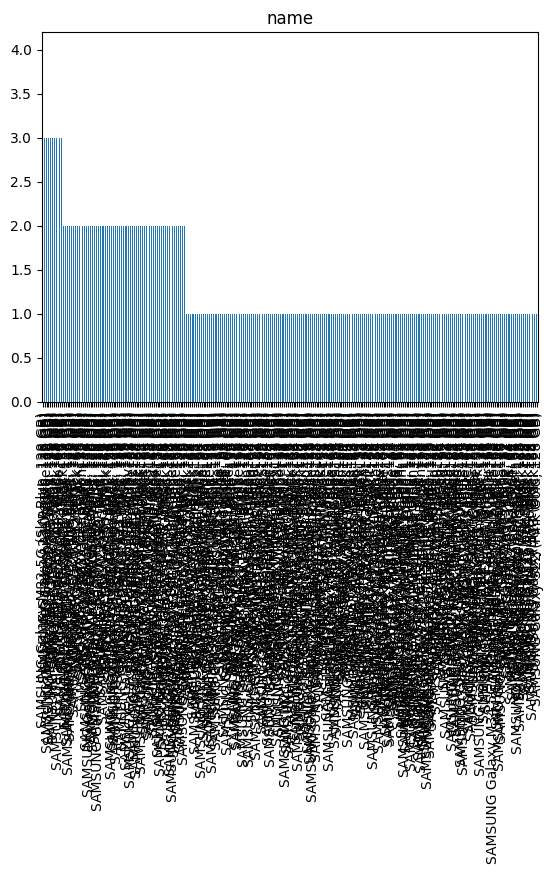

In [193]:
feature = categorical_features[0]
count = housing[feature].value_counts()
percent = 100*housing[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

b. Data Numerik

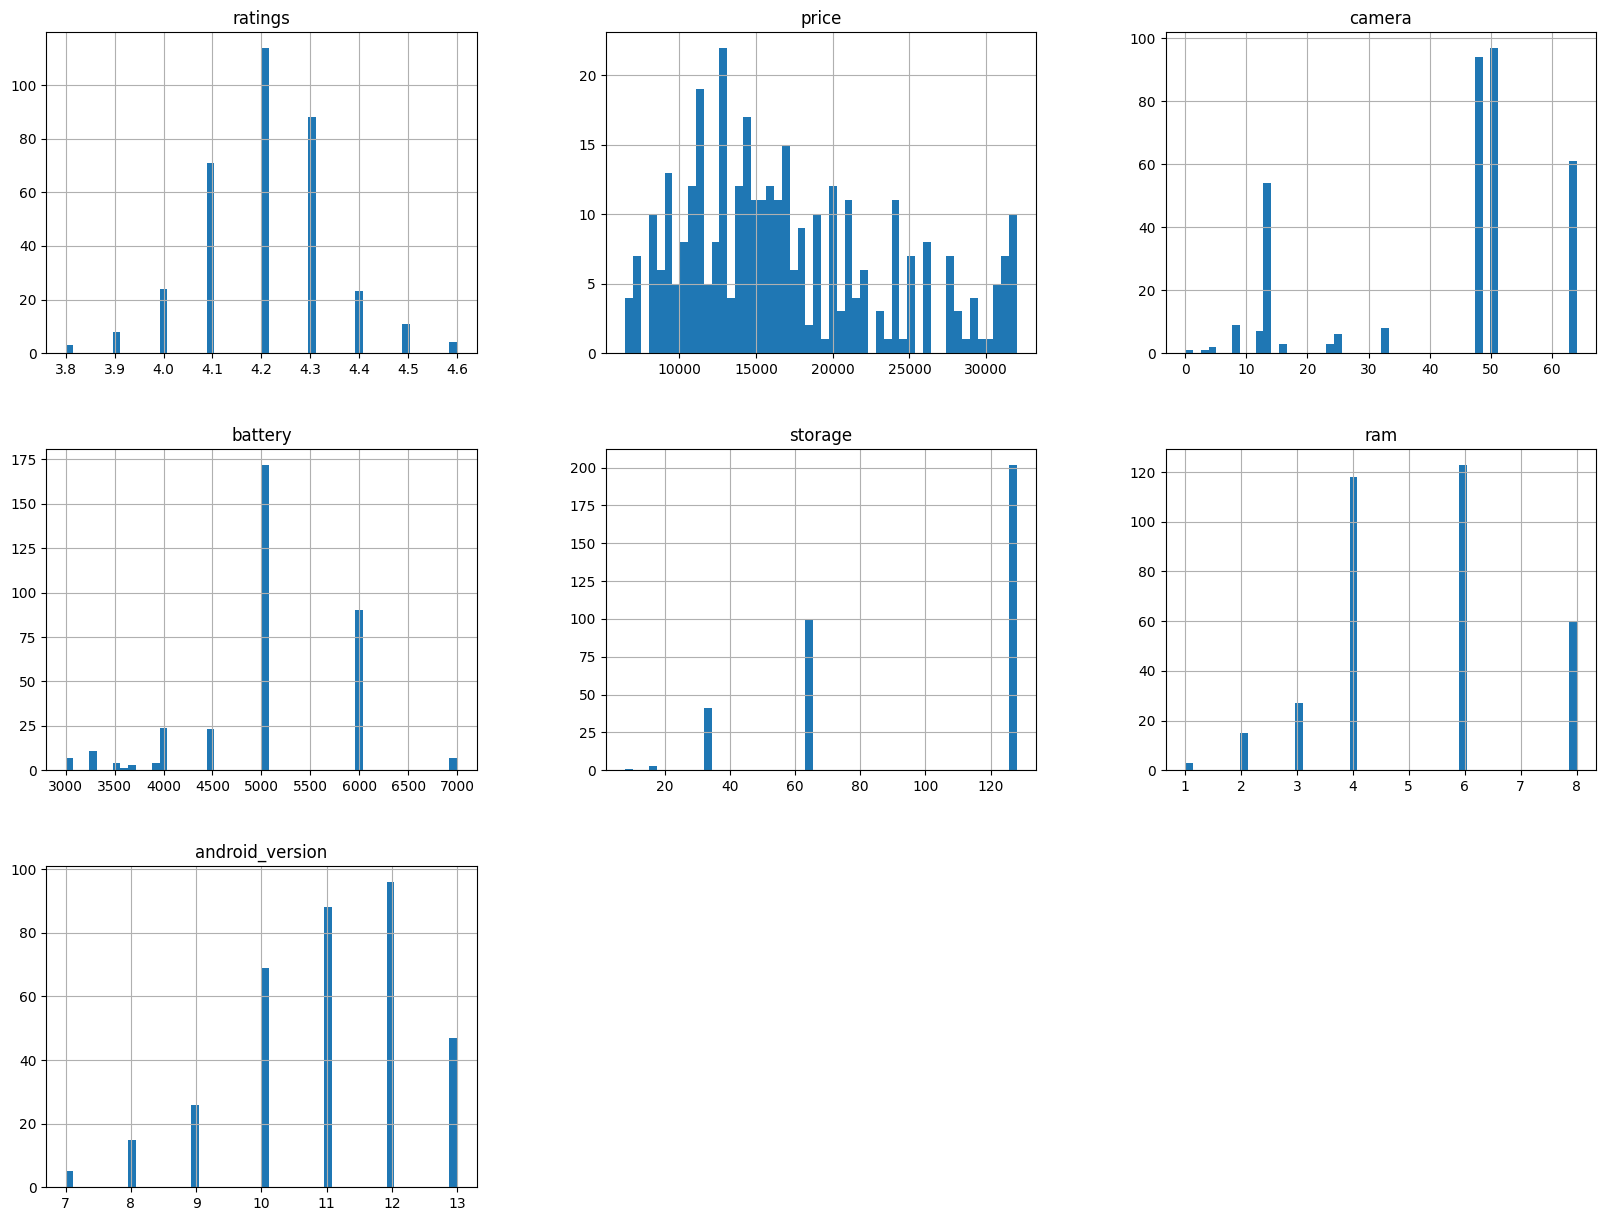

In [194]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

Dari histogram "price", diperoleh beberapa informasi, antara lain:

- Peningkatan price kebanyakan sebanding dengan penurunan jumlah sampel. Hal ini dapat terlihat jelas dari histogram "price" yang grafiknya mengalami penurunan seiring dengan semakin banyaknya jumlah sampel (sumbu x).
- Distribusi harga miring ke kanan (right-skewed). Hal ini akan berimplikasi pada model.

# Multivariate Analisys
Multivariate visualization merupakan jenis visualisasi data untuk menggambarkan informasi yang terdapat dalam lebih dari dua variabel. Jenis visualisasi ini digunakan untuk merepresentasikan hubungan dan pola yang terdapat dalam multidimensional data.

Pada tahap ini, rata-rata pada "price" terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap "price".

a. Data Kategori

<ipython-input-195-8e9033554eca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='price', kind="bar", dodge=False, height = 4, aspect = 3,  data=housing, palette="Set3")
<ipython-input-195-8e9033554eca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='price', kind="bar", dodge=False, height = 4, aspect = 3,  data=housing, palette="Set3")
<ipython-input-195-8e9033554eca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='price', kind="bar", dodge=False, height = 4, aspect = 3,  data=housing, palette="Set3")
<ipytho

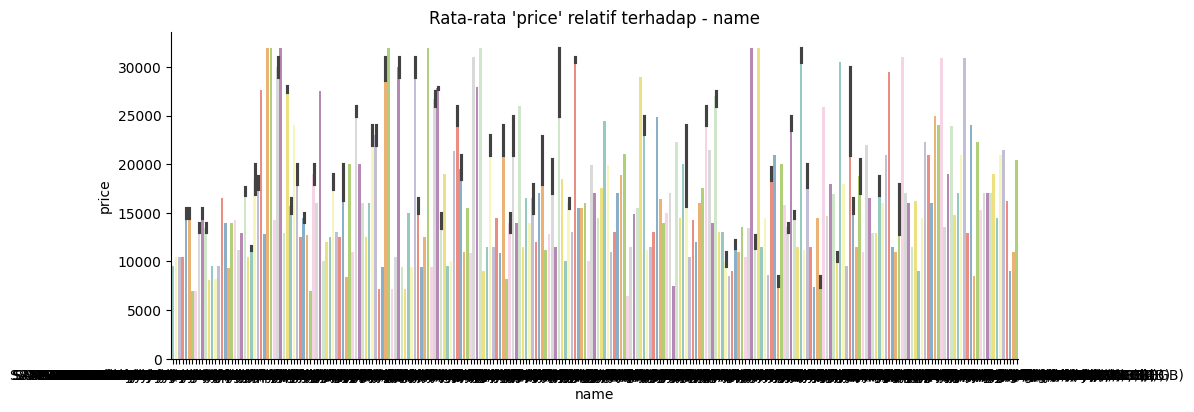

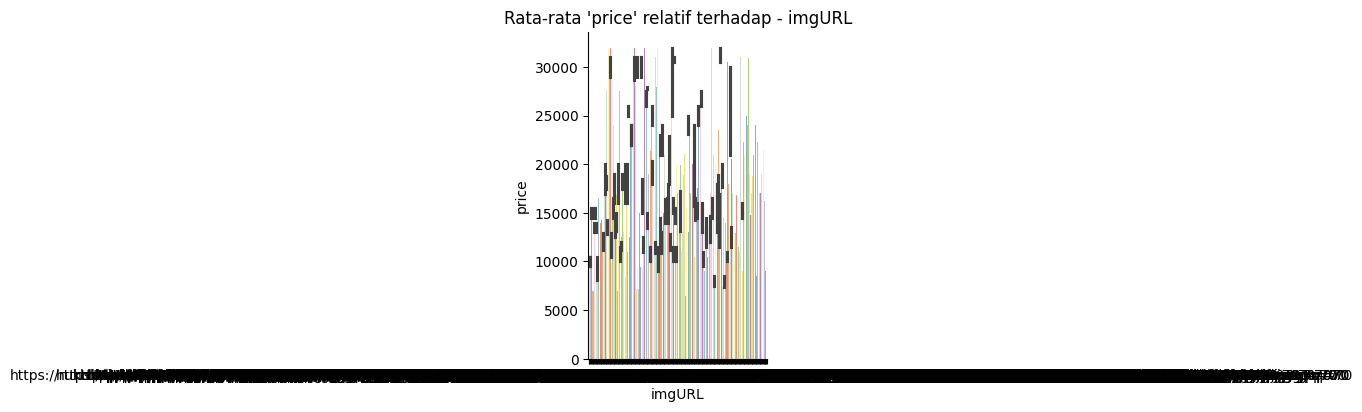

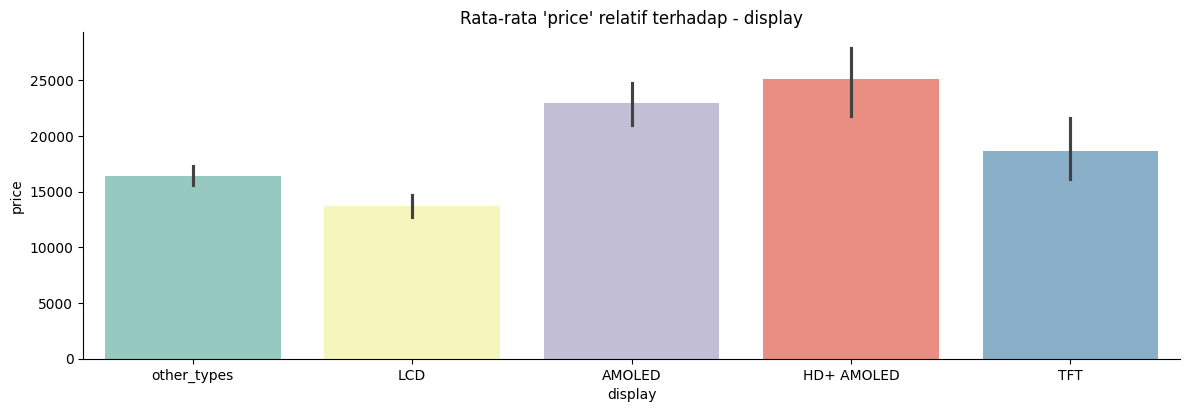

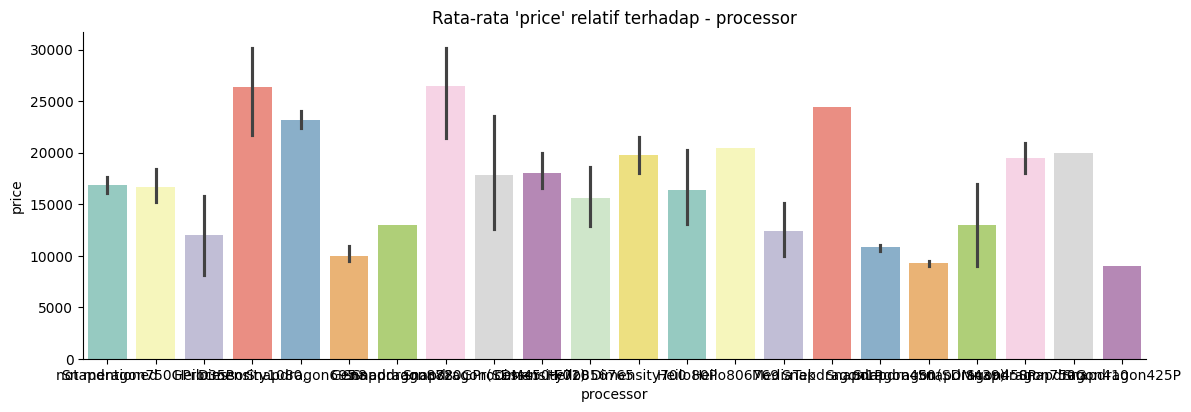

In [195]:
cat_features = housing.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y='price', kind="bar", dodge=False, height = 4, aspect = 3,  data=housing, palette="Set3")
  plt.title("Rata-rata 'price' relatif terhadap - {}".format(col))

Dengan mengamati rata-rata 'price' relatif terhadap fitur kategori di atas, diperoleh insight sebagai berikut:

Pada fitur 'display', rata-rata 'price' cenderung bervariasi. Rentangnya berada antara 14000 hingga 25000.
Nilai 'price' tertinggi berada pada nilai 'display' yaitu 'HD+AMOLED' dan nilai 'price' terendah berada pada nilai 'display' yaitu 'LCD'. Sehingga, fitur 'display' memiliki pengaruh yang signifikan terhadap rata-rata 'Price'.
Kesimpulan akhir, fitur kategori memiliki pengaruh terhadap 'Price'.

b. Data Numerik
mengamati hubungan antar fitur numerik dengan fungsi pairplot()

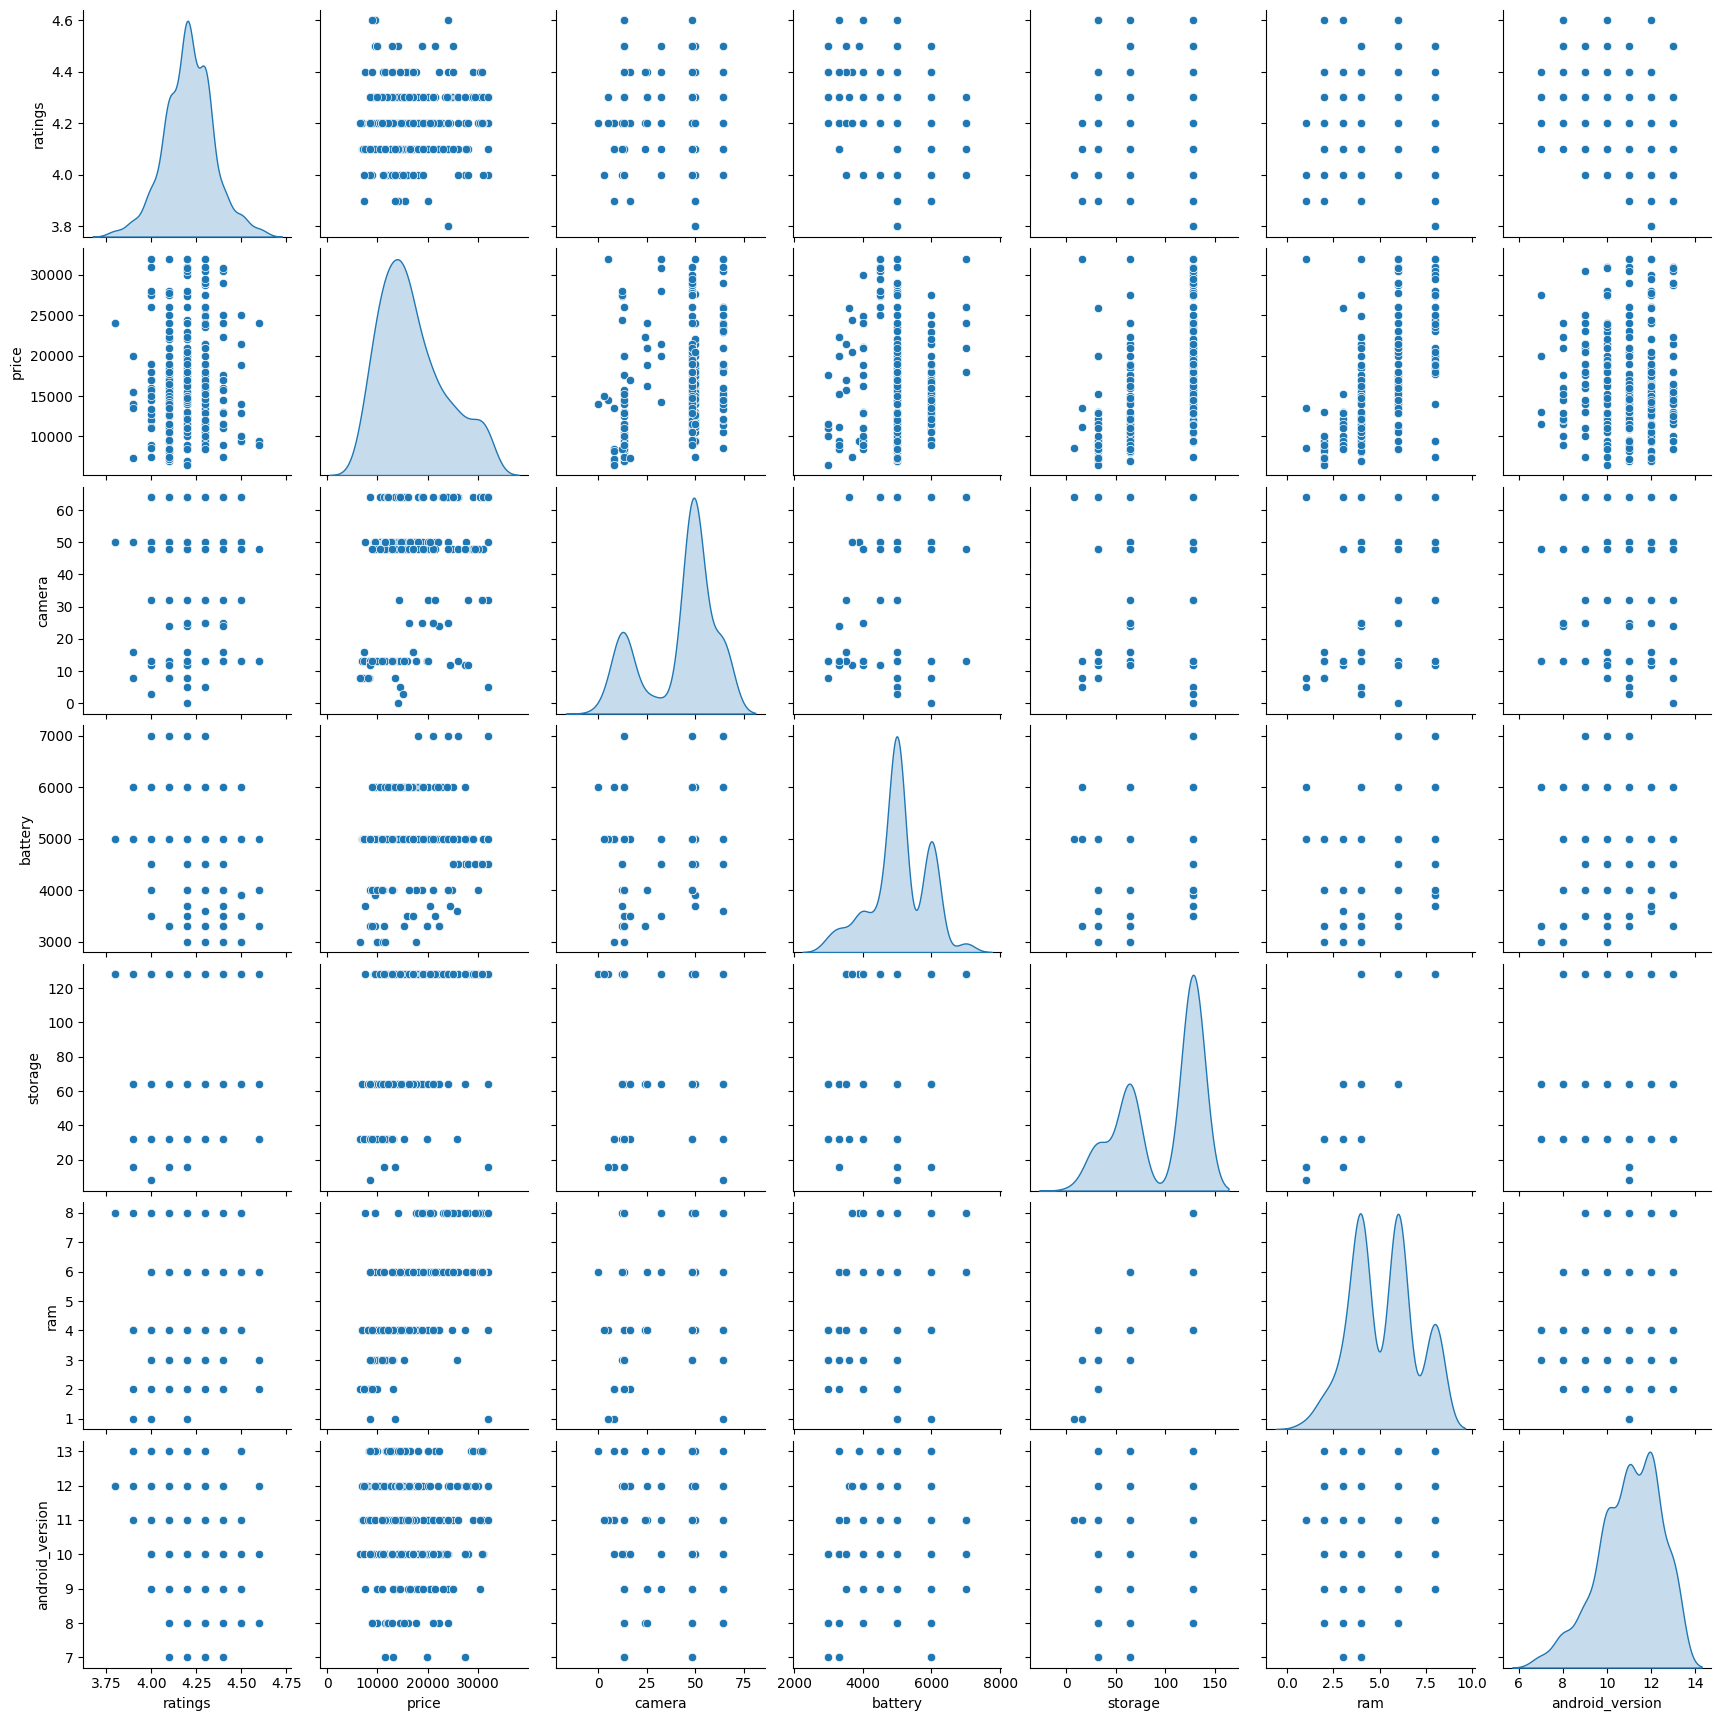

In [196]:
sns.pairplot(housing, diag_kind = 'kde')

Fungsi pairplot dari library seaborn menunjukkan relasi pasangan dalam dataset. Dari grafik, terlihat plot relasi masing-masing fitur numerik pada dataset. Pada pola sebaran data grafik pairplot sebelumnya, terlihat bahwa 'ram' memiliki korelasi dengan fitur 'price'. Sedangkan kedua fitur lainnya terlihat memiliki korelasi yang lemah karena sebarannya tidak membentuk pola

Koefisien korelasi berkisar antara -1 dan +1. Ia mengukur kekuatan hubungan antara dua variabel serta arahnya (positif atau negatif). Mengenai kekuatan hubungan antar variabel, semakin dekat nilainya ke 1 atau -1, korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0, korelasinya semakin lemah

Untuk mengevaluasi skor korelasinya, gunakan fungsi corr()

<ipython-input-197-0a3203f94792>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = housing.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

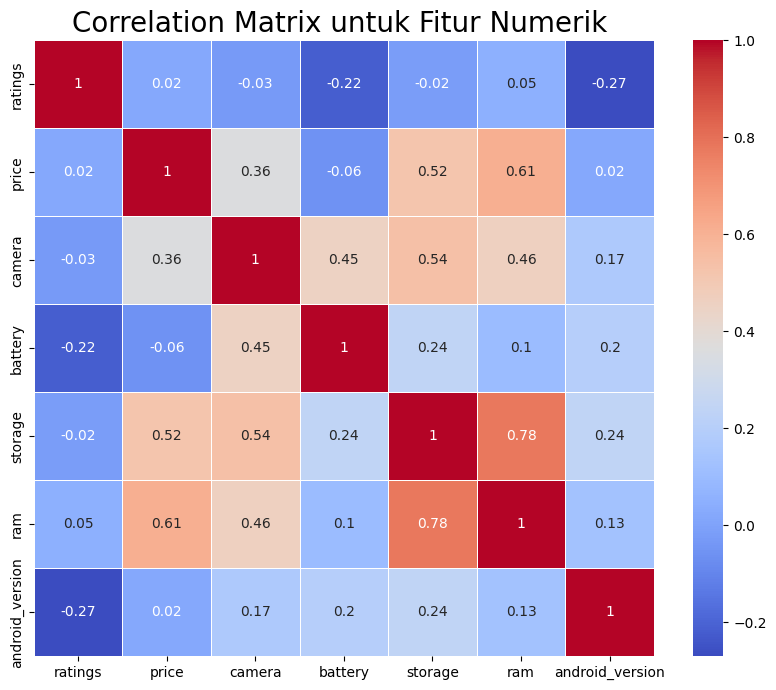

In [197]:
plt.figure(figsize=(10, 8))
correlation_matrix = housing.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)


Jika diamati, fitur 'ram' memiliki skor korelasi yang cukup besar (0.61) dengan fitur target 'price'. Artinya, fitur 'price' berkorelasi cukup tinggi dengan keempat fitur tersebut. Sementara itu, fitur lainnya memiliki korelasi negatif sehingga, fitur tersebut dapat di-drop.

In [198]:
housing.drop(['battery', 'imgURL', 'display', 'name'], inplace=True, axis=1)
housing.head()

<ipython-input-198-6e71f7c0c1d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing.drop(['battery', 'imgURL', 'display', 'name'], inplace=True, axis=1)


,ratings,price,camera,storage,ram,processor,android_version
0,4.3,9499,50,64,4,not mentioned,12
1,4.3,10499,50,128,4,not mentioned,12
2,4.3,10499,50,128,4,not mentioned,12
3,4.3,10499,50,128,4,not mentioned,12
4,4.3,15499,50,128,6,Snapdragon750GProcessor,12


# Data Preparation
Data Peparation merupakan tahapan penting dalam proses pengembangan model machine learning. Pada tahap ini lakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan. Ada beberapa tahapan yang umum dilakukan pada data preparation, antara lain, seleksi fitur, transformasi data, feature engineering, dan dimensionality reduction.

Pada bagian ini lakukan empat tahap persiapan data, yaitu:

Encoding fitur kategori.
Reduksi dimensi dengan Principal Component Analysis (PCA).
Pembagian dataset dengan fungsi train_test_split dari library sklearn.
Standarisasi.

# Encoding
Untuk melakukan proses encoding fitur kategori, salah satu teknik yang umum dilakukan adalah teknik one-hot-encoding. Lakukan proses encoding ini dengan fitur get_dummies.

In [199]:
from sklearn.preprocessing import  OneHotEncoder
housing = pd.concat([housing, pd.get_dummies(housing['processor'], prefix='processor')],axis=1)
housing.drop(['processor'], axis=1, inplace=True)
housing.head()

,ratings,price,camera,storage,ram,android_version,"processor_Dimensity1080,",processor_Dimensity700,processor_Dimensity720,processor_Gen8,...,processor_Snapdragon410,processor_Snapdragon425P,processor_Snapdragon450,processor_Snapdragon450P,processor_Snapdragon695,processor_Snapdragon720GProcessor,processor_Snapdragon750G,processor_Snapdragon750GProcessor,processor_Snapdragon888,processor_not mentioned
0,4.3,9499,50,64,4,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4.3,10499,50,128,4,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4.3,10499,50,128,4,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.3,10499,50,128,4,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4.3,15499,50,128,6,12,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Reduksi Dimensi dengan PCA
Teknik reduksi (pengurangan) dimensi adalah prosedur yang mengurangi jumlah fitur dengan tetap mempertahankan informasi pada data. Teknik pengurangan dimensi yang paling populer adalah Principal Component Analysis atau disingkat menjadi PCA. Ia adalah teknik untuk mereduksi dimensi, mengekstraksi fitur, dan mentransformasi data dari “n-dimensional space” ke dalam sistem berkoordinat baru dengan dimensi m, di mana m lebih kecil dari n.

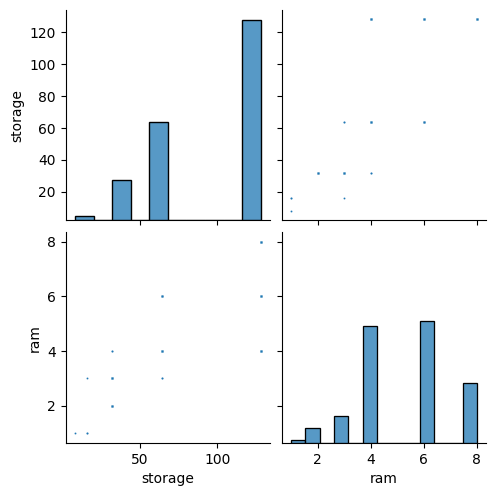

In [200]:
sns.pairplot(housing[['storage',	'ram']], plot_kws={"s":2});


Berdasarkan hasil visualisasi dapat diketahui yang memiliki hubungan antar fitur hanya dua yaitu 'storage' dan 'ram'

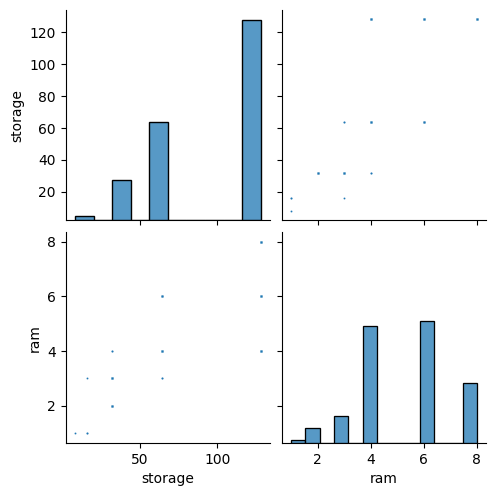

In [201]:
sns.pairplot(housing[['storage',	'ram']], plot_kws={"s": 2});



Selanjutnya, reduksi 3 fitur ini dengan PCA

In [202]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=12)
pca.fit(housing[['storage',	'ram']])
princ_comp = pca.transform(housing[['storage',	'ram']])


Setelah menerapkan class PCA, cek proporsi informasi dari ketiga komponen PCs tadi.

In [203]:
pca.explained_variance_ratio_.round(2)

array([1., 0.])

Dari output di atas 100% informasi pada satu fitur 'storage'terdapat pada PC pertama. Sedangkan sisanya, sebesar 0%  terdapat pada PC kedua.

Berdasarkan hasil ini, reduksi fitur (dimensi) dan hanya mempertahankan PC (komponen) pertama saja. PC pertama ini akan menjadi fitur 'phone properties' menggantikan ketiga fitur lainnya ('storage', 'ram'). Beri nama fitur ini 'phone properties'

In [204]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=12)
pca.fit(housing[['storage',	'ram']])
housing['phone properties'] = pca.transform(housing.loc[:, ('storage',	'ram')]).flatten()
housing.drop(['storage',	'ram'], axis=1, inplace=True)
housing.head()

,ratings,price,camera,android_version,"processor_Dimensity1080,",processor_Dimensity700,processor_Dimensity720,processor_Gen8,processor_Heilo356765,processor_Heilo35P,...,processor_Snapdragon425P,processor_Snapdragon450,processor_Snapdragon450P,processor_Snapdragon695,processor_Snapdragon720GProcessor,processor_Snapdragon750G,processor_Snapdragon750GProcessor,processor_Snapdragon888,processor_not mentioned,phone properties
0,4.3,9499,50,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,33.016523
1,4.3,10499,50,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-30.942693
2,4.3,10499,50,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-30.942693
3,4.3,10499,50,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-30.942693
4,4.3,15499,50,12,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,-31.014082


# Train-Test-Split
Membagi dataset menjadi data latih (train) dan data uji (test) merupakan hal yang harus diakukan sebelum membuat model. Hal ini diperlukan untuk menguji seberapa baik generalisasi model terhadap data baru.

Pada model ini, proporsi pembagian sebesar 90:10 dengan fungsi train_test_split dari sklearn.

In [205]:
from sklearn.model_selection import train_test_split

X = housing.drop(["price"],axis =1)
y = housing["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [206]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 346
Total # of sample in train dataset: 311
Total # of sample in test dataset: 35


# Standarisasi
Algoritma machine learning memiliki performa lebih baik dan lebih cepat ketika dimodelkan pada data dengan yang mendekati distribusi normal. Scaling dan standarisasi merupakan metode yang dapat dilakukan

Untuk fitur numerik, tidak dilakukan proses transformasi dengan one-hot-encoding seperti pada fitur kategori. Yang digunakan untuk standarisasi adalah StandarScaler.

StandardScaler merupakan proses standarisasi fitur dengan mengurangkan mean kemudian membaginya dengan standar deviasi untuk menggeser distribusi. StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0.

In [207]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['camera', 'ratings', 'phone properties']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,camera,ratings,phone properties
204,0.419808,-0.076090,-0.820002
341,1.207332,0.663406,-0.821879
61,0.419808,-0.815585,0.861432
185,-1.661506,-0.815585,1.702150
34,0.419808,0.663406,-0.823756



Seperti yang telah disebutkan sebelumnya, proses standarisasi mengubah nilai rata-rata (mean) menjadi 0 dan nilai standar deviasi menjadi 1. Untuk itu perlu dicek nilai mean dan standar deviasi pada setelah proses standarisasi.

In [208]:
X_train[numerical_features].describe().round(3)

,camera,ratings,phone properties
count,311.000,311.000,311.000
mean,-0.000,-0.000,0.000
std,1.002,1.002,1.002
min,-2.224,-3.034,-0.824
25%,-0.593,-0.816,-0.822
50%,0.307,-0.076,-0.820
75%,0.420,0.663,0.861
max,1.207,2.882,2.336


Berdasarkan tabel di atas, didapat nilai mean = 0 dan standar deviasi = 1.

# Model Development
Model development adalah tahapan dimana digunakan algoritma machine learning untuk menjawab problem statement dari tahap business understanding Pada tahap ini, dibuat model machine learning dengan tiga algoritma. Kemudian, evaluasi performa masing-masing algoritma dan pilih algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan digunakan, antara lain:

1. Regresi Linier
2. Regresi Ridge
3. Random Forest
4. Random Forest dengan Tuning GridSearchCV

In [209]:
#Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['LinearRegression', 'RidgeRegression', 'RandomForest', 'RandomForest_GridSearchCV'])

# 1. Regresi Linear
Regresi linear adalah teknik analisis data yang memprediksi nilai data yang tidak diketahui dengan menggunakan nilai data lain yang terkait dan diketahui.

In [210]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error

LR = LinearRegression()
LR.fit(X_train, y_train)
print ('Coefficients: ', LR .coef_)
print ('Intercept: ', LR .intercept_)
models.loc['train_mse','Linear Regression'] = mean_squared_error(y_pred = LR.predict(X_train), y_true=y_train)


Coefficients:  [ 1.05069171e+02  5.81920081e+02 -7.97450776e+02  1.08413184e+04
 -6.22925505e+02 -1.54110203e+03 -8.02630483e+03  5.41784653e+02
 -2.77141435e+03  3.36311494e+02 -5.81308055e+02 -2.29959418e+02
 -3.01796806e+03  1.08724195e+03  7.06779705e+03  4.43378667e-12
 -3.90685507e+03 -4.45746070e+03  2.87462775e+02  4.77799584e+03
  7.55677253e+03  7.46311494e+02 -2.05864939e+03 -6.27046898e+03
  2.41420203e+02 -3.11192981e+03]
Intercept:  25408.734487238748



Meskipun regresi linear sederhana, mudah dipahami, dan mudah digunakan, ia memiliki kelemahan karena hasil regresi merupakan hasil ramalan dari analisis regresi merupakan nilai estimasi sehingga kemungkinan untuk tidak sesuai dengan data aktual

# 2. Ridge Regrwession
Regresi Ridge merupakan metode estimasi koefisien regresi yang diperoleh melalui penambahan konstanta bias sehingga diperoleh persamaan regresi linier yang baru dan tidak mengandung multikolinieritas

In [211]:
from sklearn.linear_model import Ridge
RR = Ridge()
RR.fit(X_train, y_train)
models.loc['train_mse','Ridge Regression'] = mean_squared_error(y_pred = RR.predict(X_train), y_true=y_train)

# 3. Random Forest
Algoritma random forest dapat digunakan untuk menyelesaikan masalah klasifikasi dan regresi. Random forest juga merupakan algoritma yang sering digunakan karena cukup sederhana tetapi memiliki stabilitas yang mumpuni.

In [212]:
#Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

#buat model prediksi
RF1 = RandomForestRegressor(random_state=100)
RF1.fit(X_train, y_train)
models.loc['train_mse','Random Forest'] = mean_squared_error(y_pred=RF1.predict(X_train), y_true=y_train)

# 4. Random Forest dengan Tuning GridSearchCV
Untuk meningkatkan model, dilakukan eksperimen dengan menggunakan GridSearchCV untuk melakukan hyperparameter tuning pada Random Forest

Berikut adalah hyperparameter yang digunakan:

- n_estimator: jumlah trees (pohon) di forest
- max_depth: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.
- min_samples_split menentukan jumlah minimum sampel yang diperlukan untuk memisahkan simpul internal
- min_samples_leaf menentukan jumlah minimum sampel yang akan berada pada simpul daun

In [213]:
params = {'n_estimators' : [50,80,100],
          'max_depth' : [3,5,10],
           'min_samples_split':[2,3,4],
            'min_samples_leaf': [2,3,4]}

In [214]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator= RF1 , param_grid=params, cv=3, scoring='r2')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=100),
             param_grid={'max_depth': [3, 5, 10], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 80, 100]},
             scoring='r2')

In [215]:
grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [216]:
RF2 = RandomForestRegressor(max_depth =10,min_samples_leaf = 4,min_samples_split = 2,n_estimators = 100,random_state=100)
RF2.fit(X_train, y_train)
models.loc['train_mse','Random Forest'] = mean_squared_error(y_pred=RF2.predict(X_train), y_true=y_train)

# Evaluasi Model
Sekarang, setelah model selesai dilatih dengan 4 algoritma, selanjutnya lihat performa model dengan menggunakan metrik evaluasi

In [217]:
def metrics(name,key,arg):
    print('Name of the model: ',name)
    print('R^2 of the model:',r2_score(key,arg))
    print('MSE of the model:',np.sqrt(mean_squared_error(key,arg)))
    print('MAE of the model:',mean_absolute_error(key,arg))
    print('......')

In [218]:
y_LR = LR.predict(X_test)
y_RR = RR.predict(X_test)
y_RF1 = RF1.predict(X_test)
y_RF2 = RF2.predict(X_test)

metrics('Performa Model 1', y_test, y_LR)
metrics('Performa Model 2', y_test, y_RR)
metrics('Performa Model 3', y_test, y_RF1)
metrics('Performa Model 4', y_test, y_RF2)

Name of the model:  Performa Model 1
R^2 of the model: -645.7832446695336
MSE of the model: 128249.12298482559
MAE of the model: 122228.88321349988
......
Name of the model:  Performa Model 2
R^2 of the model: -659.5449734555519
MSE of the model: 129606.33194575572
MAE of the model: 123482.99302954163
......
Name of the model:  Performa Model 3
R^2 of the model: -0.11743320506345789
MSE of the model: 5330.719243038646
MAE of the model: 4119.282513605443
......
Name of the model:  Performa Model 4
R^2 of the model: 0.09195059382785553
MSE of the model: 4805.402422097433
MAE of the model: 4195.439306400627
......


Sekarang, setelah model selesai dilatih, lakukan proses scaling terhadap data uji. Hal ini harus dilakukan agar skala antara data latih dan data uji sama dan bisa dilakukan evaluasi.

Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1

In [219]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Selanjutnya, evaluasi ketiga model yang ada dengan metrik MSE yang telah dijelaskan di atas.

In [220]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['LR','RR','RF1', 'RF2'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'LR': LR, 'RR': RR, 'RF1': RF1, 'RF2': RF2}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
LR,25041.130104,17818.488062
RR,25248.834479,17285.904849
RF1,4953.751845,22423.175839
RF2,13471.106239,15984.848394


Untuk memudahkan, plot metrik tersebut dengan bar chart. Implementasikan kode di bawah ini:

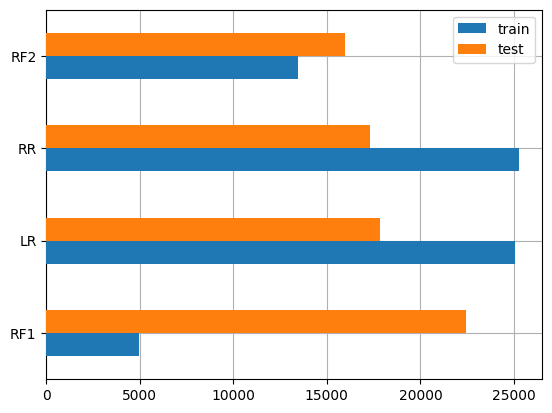

In [221]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Untuk mengujinya, buat prediksi menggunakan beberapa harga dari data test.

In [225]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
pd.DataFrame(pred_dict)

,y_true,prediksi_LR,prediksi_RR,prediksi_RF1,prediksi_RF2
264,7430,11646.4,11679.8,9288.7,10543.9


Terlihat bahwa prediksi dengan Random Forest (RF), baik RF1 ataupun RF2 memberikan hasil yang paling mendekati y_true.